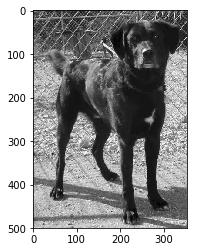

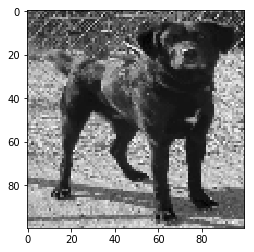

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import os

datadir = "PetImages"
categories = ["Dog", "Cat"]

for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break
# print(img_array.shape)


IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [9]:
# Training data
IMG_SIZE = 100
training_data = []

def create_trainig_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in tqdm(os.listdir(path)): # tqdm is for progress bar
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_trainig_data()
print(len(training_data))          

100%|██████████| 12486/12486 [00:17<00:00, 694.69it/s]


In [15]:
import random
random.shuffle(training_data)

for sample in training_data[0:10]:
    print(sample[1]) # class is mixed


0
1
0
0
0
0
0
1
1
0


In [18]:
# Make model
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)

print(x[0])
print(x[0].reshape(-1,IMG_SIZE,IMG_SIZE,1))
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

[[205 222 209 ... 255 255 255]
 [244 244 244 ... 255 255 255]
 [250 249 250 ... 253 239 198]
 ...
 [139 188 187 ...  45  46  44]
 [171 180 147 ...  75  72  73]
 [141 129 112 ...  76  76  73]]
[[[[205]
   [222]
   [209]
   ...
   [255]
   [255]
   [255]]

  [[244]
   [244]
   [244]
   ...
   [255]
   [255]
   [255]]

  [[250]
   [249]
   [250]
   ...
   [253]
   [239]
   [198]]

  ...

  [[139]
   [188]
   [187]
   ...
   [ 45]
   [ 46]
   [ 44]]

  [[171]
   [180]
   [147]
   ...
   [ 75]
   [ 72]
   [ 73]]

  [[141]
   [129]
   [112]
   ...
   [ 76]
   [ 76]
   [ 73]]]]


In [20]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

pickle_in = open("x.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

